In [1]:
import os

In [2]:
os.getcwd()

'F:\\Learning datascience\\Python Project'

In [3]:
os.chdir('F:\Capstone Project\Prem sir')

In [4]:
import pandas as pd

In [5]:
fan_train=pd.read_csv('acq_data_3status.csv',sep=',',header=0,encoding='latin')

In [6]:
fan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436347 entries, 0 to 436346
Data columns (total 28 columns):
Unnamed: 0                                 436347 non-null int64
LOAN IDENTIFIER                            436347 non-null int64
ORIGINATION CHANNEL                        436347 non-null object
SELLER NAME                                436347 non-null object
ORIGINAL INTEREST RATE                     436347 non-null float64
ORIGINAL UPB                               436347 non-null int64
ORIGINAL LOAN TERM                         436347 non-null int64
ORIGINATION DATE                           436347 non-null object
FIRST PAYMENT DATE                         436347 non-null object
ORIGINAL LOAN-TO-VALUE (LTV)               436347 non-null int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)     436347 non-null int64
NUMBER OF BORROWERS                        436347 non-null int64
ORIGINAL DEBT TO INCOME RATIO              436244 non-null float64
BORROWER CREDIT SCORE AT ORIGINATION

In [7]:
fan_train.rename(columns={'Default_status1':'Default Status'},inplace=True)
fan_train.rename(columns={'ORIGINAL INTEREST RATE':'INTEREST RATE'},inplace=True)
fan_train.rename(columns={'ORIGINAL UPB':'UPB'},inplace=True)
fan_train.rename(columns={'ORIGINAL LOAN TERM':'LOAN TERM'},inplace=True)
fan_train.rename(columns={'ORIGINAL LOAN-TO-VALUE (LTV)':'LOAN-TO-VALUE(LTV)'},inplace=True)
fan_train.rename(columns={'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)':'COMBINED LOAN-TO-VALUE (CLTV)'},inplace=True)
fan_train.rename(columns={'ORIGINAL DEBT TO INCOME RATIO':'DEBT TO INCOME RATIO'},inplace=True)

In [8]:
fan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436347 entries, 0 to 436346
Data columns (total 28 columns):
Unnamed: 0                                 436347 non-null int64
LOAN IDENTIFIER                            436347 non-null int64
ORIGINATION CHANNEL                        436347 non-null object
SELLER NAME                                436347 non-null object
INTEREST RATE                              436347 non-null float64
UPB                                        436347 non-null int64
LOAN TERM                                  436347 non-null int64
ORIGINATION DATE                           436347 non-null object
FIRST PAYMENT DATE                         436347 non-null object
LOAN-TO-VALUE(LTV)                         436347 non-null int64
COMBINED LOAN-TO-VALUE (CLTV)              436347 non-null int64
NUMBER OF BORROWERS                        436347 non-null int64
DEBT TO INCOME RATIO                       436244 non-null float64
BORROWER CREDIT SCORE AT ORIGINATION

Categorial Variable analysis 

In [9]:
cate_v=fan_train.dtypes.loc[fan_train.dtypes=='object'].index
cate_v

Index(['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINATION DATE',
       'FIRST PAYMENT DATE', 'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE',
       'PROPERTY TYPE', 'OCCUPANCY TYPE', 'PROPERTY STATE', 'PRODUCT TYPE',
       'RELOCATION MORTGAGE INDICATOR'],
      dtype='object')

In [10]:
fan_train[cate_v].apply(lambda x: len(x.unique()))

ORIGINATION CHANNEL                 3
SELLER NAME                        16
ORIGINATION DATE                   27
FIRST PAYMENT DATE                 27
FIRST TIME HOME BUYER INDICATOR     2
LOAN PURPOSE                        3
PROPERTY TYPE                       5
OCCUPANCY TYPE                      3
PROPERTY STATE                     54
PRODUCT TYPE                        1
RELOCATION MORTGAGE INDICATOR       2
dtype: int64

AS product type has only one unique value ,so dropping the column doesn't have any impact on analysis
so dropping product type column

In [11]:
fan_train.drop(["PRODUCT TYPE"],axis=1,inplace=True)

In [12]:
fan_train.head(5)

,Unnamed: 0,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,INTEREST RATE,UPB,LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,LOAN-TO-VALUE(LTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,Default_status,Default Status
0,0,100002091588,R,OTHER,4.125,345000,360,12/2014,02/2015,95,...,1,P,NC,282,30.0,NaN,1.0,N,NaN,0
1,1,100004219574,R,"WELLS FARGO BANK, N.A.",4.125,293000,312,12/2014,02/2015,77,...,1,P,IL,605,NaN,723.0,NaN,N,NaN,0
2,2,100004457300,C,"WELLS FARGO BANK, N.A.",3.875,304000,360,11/2014,01/2015,80,...,1,P,GA,300,NaN,NaN,NaN,N,NaN,0
3,3,100006803390,R,OTHER,4.375,110000,360,10/2014,12/2014,65,...,1,P,VA,229,NaN,736.0,NaN,N,100.0,100
4,4,100008763886,R,QUICKEN LOANS INC.,4.375,325000,348,01/2015,03/2015,72,...,1,P,CA,936,NaN,797.0,NaN,N,100.0,100


In [13]:
fan_train['ORIGINATION CHANNEL'].value_counts()/fan_train.shape[0]

R    0.587746
C    0.300722
B    0.111533
Name: ORIGINATION CHANNEL, dtype: float64

In [14]:
fan_train['FIRST TIME HOME BUYER INDICATOR'].value_counts()/fan_train.shape[0]

N    0.837661
Y    0.162339
Name: FIRST TIME HOME BUYER INDICATOR, dtype: float64

In [15]:
fan_train['SELLER NAME'].value_counts()/fan_train.shape[0]

OTHER                                                                   0.554836
WELLS FARGO BANK, N.A.                                                  0.130786
QUICKEN LOANS INC.                                                      0.086929
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION                               0.037246
FLAGSTAR BANK, FSB                                                      0.026600
DITECH FINANCIAL LLC                                                    0.022736
FRANKLIN AMERICAN MORTGAGE COMPANY                                      0.018254
SUNTRUST MORTGAGE INC.                                                  0.017259
STEARNS LENDING, LLC                                                    0.016219
FREEDOM MORTGAGE CORP.                                                  0.016090
NATIONSTAR MORTGAGE, LLC                                                0.014752
CITIMORTGAGE, INC.                                                      0.014695
UNITED SHORE FINANCIAL SERVI

In [16]:
fan_train['LOAN PURPOSE'].value_counts()/fan_train.shape[0]

P    0.419845
R    0.356372
C    0.223783
Name: LOAN PURPOSE, dtype: float64

In [17]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [18]:
fan_train['OCCUPANCY TYPE'].value_counts()/fan_train.shape[0]

P    0.866118
I    0.094150
S    0.039732
Name: OCCUPANCY TYPE, dtype: float64

In [19]:
fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]

CA    0.192246
TX    0.078543
FL    0.052981
IL    0.042560
CO    0.036982
WA    0.031768
MI    0.030991
AZ    0.029312
NY    0.028658
PA    0.027125
VA    0.026594
NC    0.025489
GA    0.025335
NJ    0.025319
MA    0.023610
WI    0.023060
OH    0.022122
MN    0.021838
MD    0.019299
OR    0.018382
UT    0.017090
MO    0.016849
TN    0.015829
IN    0.015387
SC    0.013359
NV    0.012607
IA    0.010322
LA    0.010022
AL    0.009832
OK    0.008791
CT    0.007813
KY    0.007657
ID    0.007196
NE    0.006614
KS    0.005567
NM    0.005189
AR    0.004957
MS    0.004240
HI    0.003903
MT    0.003775
NH    0.003598
DE    0.003406
SD    0.003206
PR    0.002954
DC    0.002801
ND    0.002564
WY    0.002457
RI    0.002404
ME    0.002104
WV    0.002005
AK    0.001799
VT    0.001407
VI    0.000062
GU    0.000023
Name: PROPERTY STATE, dtype: float64

In [20]:
fan_train['RELOCATION MORTGAGE INDICATOR'].value_counts()/fan_train.shape[0]

N    0.994044
Y    0.005956
Name: RELOCATION MORTGAGE INDICATOR, dtype: float64

In [21]:
fan_train['Default Status'].value_counts()/fan_train.shape[0]

0      0.673634
100    0.318907
1      0.007460
Name: Default Status, dtype: float64

 Continuous Variable

In [22]:
fan_train.describe()

,Unnamed: 0,LOAN IDENTIFIER,INTEREST RATE,UPB,LOAN TERM,LOAN-TO-VALUE(LTV),COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,NUMBER OF UNITS,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,Default_status,Default Status
count,436347.000000,4.363470e+05,436347.000000,4.363470e+05,436347.000000,436347.000000,436347.000000,436347.000000,436244.000000,436192.000000,436347.000000,436347.000000,114996.000000,219988.000000,114996.000000,142409.000000,436347.000000
mean,218173.000000,5.506554e+11,3.997689,2.298115e+05,316.810039,74.038570,74.719739,1.509365,33.323450,754.253356,1.035827,590.438974,24.337551,761.534184,1.223286,97.737187,31.898134
std,125962.673293,2.594856e+11,0.478863,1.188393e+05,76.706949,16.293784,16.310479,0.511084,8.902985,46.228860,0.257164,303.207438,7.391711,43.212877,0.416450,14.795261,46.600310
min,0.000000,1.000021e+11,2.250000,1.000000e+04,60.000000,3.000000,3.000000,1.000000,1.000000,471.000000,1.000000,0.000000,6.000000,490.000000,1.000000,1.000000,0.000000
25%,109086.500000,3.257773e+11,3.750000,1.370000e+05,300.000000,66.000000,67.000000,1.000000,27.000000,723.000000,1.000000,322.000000,25.000000,735.000000,1.000000,100.000000,0.000000
50%,218173.000000,5.514693e+11,4.000000,2.090000e+05,360.000000,78.000000,79.000000,2.000000,34.000000,766.000000,1.000000,612.000000,25.000000,773.000000,1.000000,100.000000,0.000000
75%,327259.500000,7.753804e+11,4.250000,3.060000e+05,360.000000,84.000000,85.000000,2.000000,41.000000,792.000000,1.000000,895.000000,30.000000,796.000000,1.000000,100.000000,100.000000
max,436346.000000,9.999957e+11,6.125000,1.203000e+06,360.000000,97.000000,107.000000,6.000000,51.000000,839.000000,4.000000,999.000000,40.000000,837.000000,2.000000,100.000000,100.000000


In [23]:
fan_train.plot('LOAN-TO-VALUE(LTV)','LOAN TERM',kind='scatter')

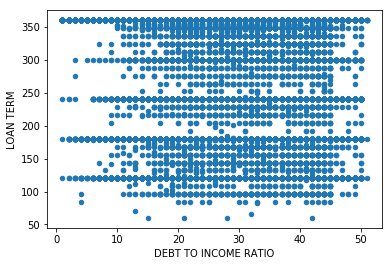

In [24]:
fan_train.plot('DEBT TO INCOME RATIO','LOAN TERM',kind='scatter')

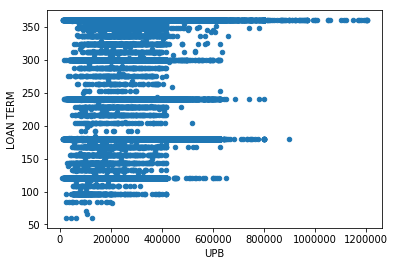

In [25]:
fan_train.plot('UPB','LOAN TERM',kind='scatter')

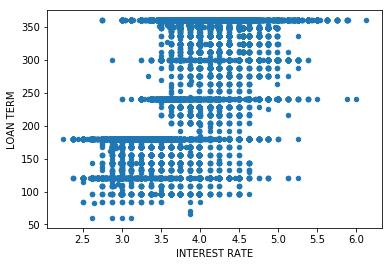

In [26]:
fan_train.plot('INTEREST RATE','LOAN TERM',kind='scatter')

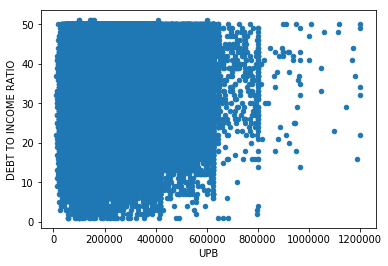

In [27]:
fan_train.plot('UPB','DEBT TO INCOME RATIO',kind='scatter')

In [28]:
ct=pd.crosstab(fan_train['PROPERTY TYPE'],fan_train['Default Status'],margins=True)
ct

Default Status,0,1,100,All
PROPERTY TYPE,,,,
CO,25603,215,14414,40232
CP,1466,9,385,1860
MH,1748,20,439,2207
PU,76182,952,41115,118249
SF,188939,2059,82801,273799
All,293938,3255,139154,436347


In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

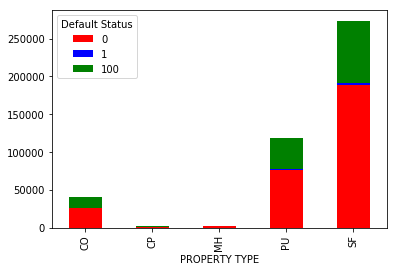

In [30]:
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)

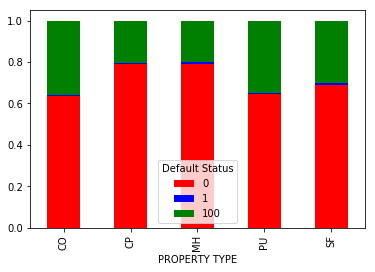

In [31]:
def percConvert(ser):
    return ser/float(ser[-1])
ctprop=ct.apply(percConvert,axis=1)
ctprop.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)

In [32]:
ctfthb=pd.crosstab(fan_train['FIRST TIME HOME BUYER INDICATOR'],fan_train['Default Status'],margins=True)
ctfthb

Default Status,0,1,100,All
FIRST TIME HOME BUYER INDICATOR,,,,
N,242486,2396,120629,365511
Y,51452,859,18525,70836
All,293938,3255,139154,436347


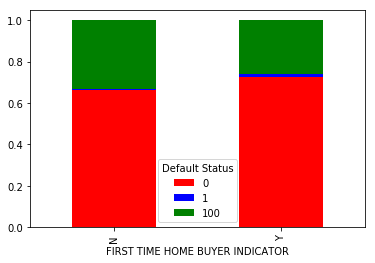

In [33]:
ctfthbp=ctfthb.apply(percConvert,axis=1)
ctfthbp.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)

In [34]:
ctseller=pd.crosstab(fan_train['SELLER NAME'],fan_train['Default Status'],margins=True)
ctseller

Default Status,0,1,100,All
SELLER NAME,,,,
"CITIMORTGAGE, INC.",4545,27,1840,6412
DITECH FINANCIAL LLC,6299,86,3536,9921
"FLAGSTAR BANK, FSB",7591,89,3927,11607
FRANKLIN AMERICAN MORTGAGE COMPANY,5326,77,2562,7965
FREEDOM MORTGAGE CORP.,3984,38,2999,7021
IMPAC MORTGAGE CORP.,2251,17,2277,4545
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",10173,84,5995,16252
"LOANDEPOT.COM, LLC",2740,40,1857,4637
"NATIONSTAR MORTGAGE, LLC",3887,54,2496,6437


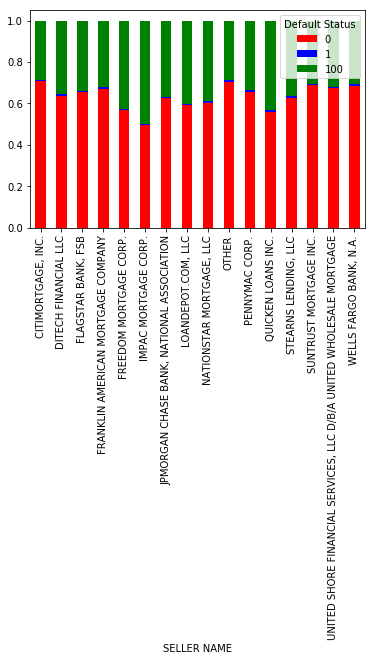

In [35]:
ctsellerp=ctseller.apply(percConvert,axis=1)
ctsellerp.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)

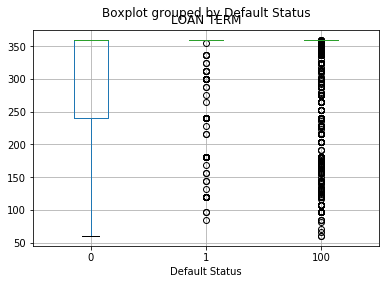

In [36]:
fan_train.boxplot(column='LOAN TERM',by='Default Status')

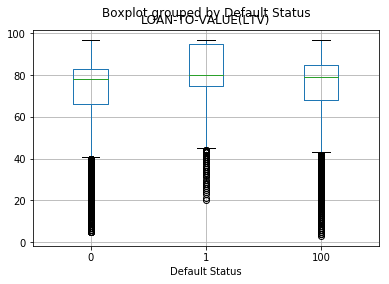

In [37]:
fan_train.boxplot(column='LOAN-TO-VALUE(LTV)',by='Default Status')

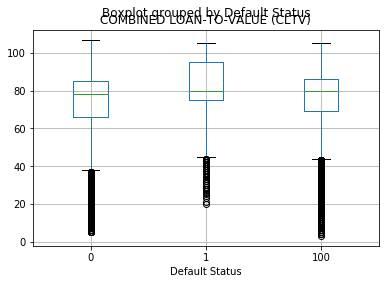

In [38]:
fan_train.boxplot(column='COMBINED LOAN-TO-VALUE (CLTV)',by='Default Status')

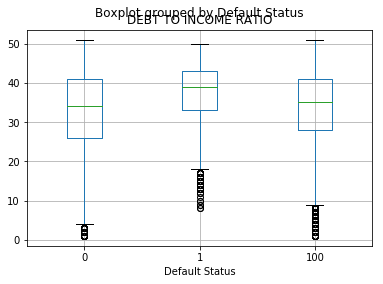

In [39]:
fan_train.boxplot(column='DEBT TO INCOME RATIO',by='Default Status')

Missing Value Treatment 

In [40]:
fan_train.apply(lambda x: sum(x.isnull()))

Unnamed: 0                                      0
LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
INTEREST RATE                                   0
UPB                                             0
LOAN TERM                                       0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
LOAN-TO-VALUE(LTV)                              0
COMBINED LOAN-TO-VALUE (CLTV)                   0
NUMBER OF BORROWERS                             0
DEBT TO INCOME RATIO                          103
BORROWER CREDIT SCORE AT ORIGINATION          155
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0


In [41]:
Mean=fan_train['DEBT TO INCOME RATIO'].mean()

In [42]:
fan_train['DEBT TO INCOME RATIO'].median()

34.0

In [43]:
fan_train['DEBT TO INCOME RATIO'].mode()

0    44.0
dtype: float64

In [44]:
fan_train['DEBT TO INCOME RATIO']=fan_train['DEBT TO INCOME RATIO'].fillna(Mean)

In [45]:
meanb=fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].mean()
meanb

754.2533563201526

In [46]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].median()

766.0

In [47]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].mode()

0    801.0
dtype: float64

In [48]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION']=fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].fillna(meanb)

In [49]:
fan_train.apply(lambda x: sum(x.isnull()))

Unnamed: 0                                      0
LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
INTEREST RATE                                   0
UPB                                             0
LOAN TERM                                       0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
LOAN-TO-VALUE(LTV)                              0
COMBINED LOAN-TO-VALUE (CLTV)                   0
NUMBER OF BORROWERS                             0
DEBT TO INCOME RATIO                            0
BORROWER CREDIT SCORE AT ORIGINATION            0
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0


Outlier treatment

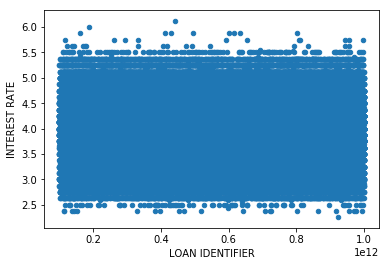

In [50]:
fan_train.plot('LOAN IDENTIFIER','INTEREST RATE',kind='scatter')

few loan identifier having interest rate more than 5.5 percent

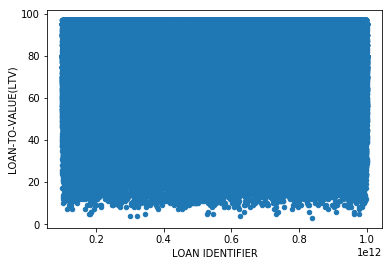

In [51]:
fan_train.plot('LOAN IDENTIFIER','LOAN-TO-VALUE(LTV)',kind='scatter')

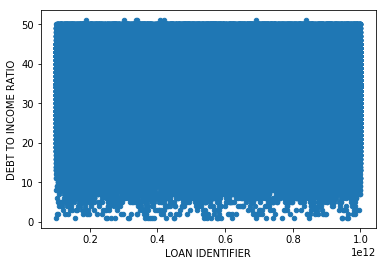

In [52]:
fan_train.plot('LOAN IDENTIFIER','DEBT TO INCOME RATIO',kind='scatter')

Variable Transformation

In [53]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [54]:
categories_comb= ['Others','MH and CP']

In [55]:
for cat in categories_comb:
    fan_train['PROPERTY TYPE'].replace({cat:'Others'},inplace=True)

In [56]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [57]:
frq=fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]
frq

CA    0.192246
TX    0.078543
FL    0.052981
IL    0.042560
CO    0.036982
WA    0.031768
MI    0.030991
AZ    0.029312
NY    0.028658
PA    0.027125
VA    0.026594
NC    0.025489
GA    0.025335
NJ    0.025319
MA    0.023610
WI    0.023060
OH    0.022122
MN    0.021838
MD    0.019299
OR    0.018382
UT    0.017090
MO    0.016849
TN    0.015829
IN    0.015387
SC    0.013359
NV    0.012607
IA    0.010322
LA    0.010022
AL    0.009832
OK    0.008791
CT    0.007813
KY    0.007657
ID    0.007196
NE    0.006614
KS    0.005567
NM    0.005189
AR    0.004957
MS    0.004240
HI    0.003903
MT    0.003775
NH    0.003598
DE    0.003406
SD    0.003206
PR    0.002954
DC    0.002801
ND    0.002564
WY    0.002457
RI    0.002404
ME    0.002104
WV    0.002005
AK    0.001799
VT    0.001407
VI    0.000062
GU    0.000023
Name: PROPERTY STATE, dtype: float64

In [58]:
cate_prop_state=frq.loc[frq.values<.025].index

for cat in cate_prop_state:
    fan_train['PROPERTY STATE'].replace({cat:'other states'},inplace=True)

In [59]:
fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]

other states    0.346096
CA              0.192246
TX              0.078543
FL              0.052981
IL              0.042560
CO              0.036982
WA              0.031768
MI              0.030991
AZ              0.029312
NY              0.028658
PA              0.027125
VA              0.026594
NC              0.025489
GA              0.025335
NJ              0.025319
Name: PROPERTY STATE, dtype: float64

In [60]:
fan_train.drop(["LOAN IDENTIFIER"],axis=1,inplace=True)
fan_train.drop(["SELLER NAME"],axis=1,inplace=True)
fan_train.drop(["ORIGINATION DATE"],axis=1,inplace=True)
fan_train.drop(["FIRST PAYMENT DATE"],axis=1,inplace=True)
fan_train.drop(["NUMBER OF BORROWERS"],axis=1,inplace=True)
fan_train.drop(["ZIP CODE SHORT"],axis=1,inplace=True)
fan_train.drop(["PRIMARY MORTGAGE INSURANCE PERCENT"],axis=1,inplace=True)
fan_train.drop(["CO-BORROWER CREDIT SCORE AT ORIGINATION"],axis=1,inplace=True)

In [61]:
fan_train.dtypes

Unnamed: 0                                int64
ORIGINATION CHANNEL                      object
INTEREST RATE                           float64
UPB                                       int64
LOAN TERM                                 int64
LOAN-TO-VALUE(LTV)                        int64
COMBINED LOAN-TO-VALUE (CLTV)             int64
DEBT TO INCOME RATIO                    float64
BORROWER CREDIT SCORE AT ORIGINATION    float64
FIRST TIME HOME BUYER INDICATOR          object
LOAN PURPOSE                             object
PROPERTY TYPE                            object
NUMBER OF UNITS                           int64
OCCUPANCY TYPE                           object
PROPERTY STATE                           object
MORTGAGE INSURANCE TYPE                 float64
RELOCATION MORTGAGE INDICATOR            object
Default_status                          float64
Default Status                            int64
dtype: object

In [62]:
fan_train.drop(["COMBINED LOAN-TO-VALUE (CLTV)"],axis=1,inplace=True)
fan_train.drop(["NUMBER OF UNITS"],axis=1,inplace=True)
fan_train.drop(["MORTGAGE INSURANCE TYPE"],axis=1,inplace=True)


In [63]:
fan_train.dtypes

Unnamed: 0                                int64
ORIGINATION CHANNEL                      object
INTEREST RATE                           float64
UPB                                       int64
LOAN TERM                                 int64
LOAN-TO-VALUE(LTV)                        int64
DEBT TO INCOME RATIO                    float64
BORROWER CREDIT SCORE AT ORIGINATION    float64
FIRST TIME HOME BUYER INDICATOR          object
LOAN PURPOSE                             object
PROPERTY TYPE                            object
OCCUPANCY TYPE                           object
PROPERTY STATE                           object
RELOCATION MORTGAGE INDICATOR            object
Default_status                          float64
Default Status                            int64
dtype: object

Predictive Modelling using Decision Tree Model

Data Preprocessing

In [64]:
fan_train.drop(["Default_status"],axis=1,inplace=True)

In [65]:
fan_train.drop(["Unnamed: 0"],axis=1,inplace=True)

In [66]:
fan_train.drop(["UPB"],axis=1,inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
cate_v=fan_train.dtypes.loc[fan_train.dtypes=='object'].index
cate_v

Index(['ORIGINATION CHANNEL', 'FIRST TIME HOME BUYER INDICATOR',
       'LOAN PURPOSE', 'PROPERTY TYPE', 'OCCUPANCY TYPE', 'PROPERTY STATE',
       'RELOCATION MORTGAGE INDICATOR'],
      dtype='object')

In [69]:
le= LabelEncoder()
for var in cate_v:
    fan_train[var]=le.fit_transform(fan_train[var])

In [70]:
fan_train.dtypes

ORIGINATION CHANNEL                       int32
INTEREST RATE                           float64
LOAN TERM                                 int64
LOAN-TO-VALUE(LTV)                        int64
DEBT TO INCOME RATIO                    float64
BORROWER CREDIT SCORE AT ORIGINATION    float64
FIRST TIME HOME BUYER INDICATOR           int32
LOAN PURPOSE                              int32
PROPERTY TYPE                             int32
OCCUPANCY TYPE                            int32
PROPERTY STATE                            int32
RELOCATION MORTGAGE INDICATOR             int32
Default Status                            int64
dtype: object

In [71]:
fan_trainf=fan_train[fan_train['Default Status'] !=100]

In [72]:
fan_trainf.head(5)

,ORIGINATION CHANNEL,INTEREST RATE,LOAN TERM,LOAN-TO-VALUE(LTV),DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,OCCUPANCY TYPE,PROPERTY STATE,RELOCATION MORTGAGE INDICATOR,Default Status
0,2,4.125,360,95,32.0,652.0,0,1,3,1,7,0,0
1,2,4.125,312,77,34.0,732.0,0,2,3,1,5,0,0
2,1,3.875,360,80,42.0,813.0,0,1,4,1,4,0,0
5,2,3.125,180,86,34.0,797.0,0,2,4,1,14,0,0
6,2,4.125,360,38,35.0,738.0,0,0,4,1,14,0,0


In [73]:
fan_trainf.shape

(297193, 13)

In [74]:
fan_trainf.dtypes

ORIGINATION CHANNEL                       int32
INTEREST RATE                           float64
LOAN TERM                                 int64
LOAN-TO-VALUE(LTV)                        int64
DEBT TO INCOME RATIO                    float64
BORROWER CREDIT SCORE AT ORIGINATION    float64
FIRST TIME HOME BUYER INDICATOR           int32
LOAN PURPOSE                              int32
PROPERTY TYPE                             int32
OCCUPANCY TYPE                            int32
PROPERTY STATE                            int32
RELOCATION MORTGAGE INDICATOR             int32
Default Status                            int64
dtype: object

No default = 293938
default = 3255
Proportion of no default to default = 1.11%


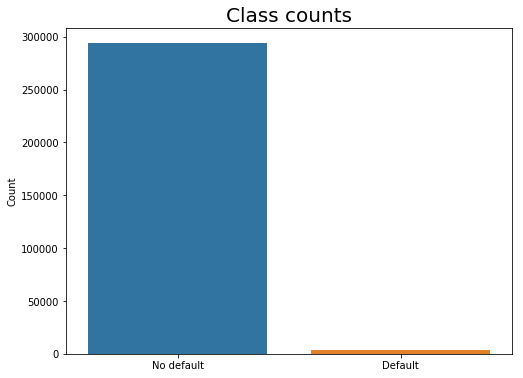

In [75]:
no_default= fan_trainf[fan_trainf["Default Status"] == 0].shape[0]
default = fan_trainf[fan_trainf["Default Status"] == 1].shape[0]
print(f"No default = {no_default}")
print(f"default = {default}")
print(f"Proportion of no default to default = {(default /no_default) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sn.countplot(fan_trainf["Default Status"])
plt.xticks((0, 1), ["No default", "Default"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [76]:
X = fan_trainf.loc[:, fan_trainf.columns != "Default Status"].values
y = fan_trainf.loc[:, fan_trainf.columns == "Default Status"].values.flatten()

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, confusion_matrix,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
print(f"Original data shapes: {X_train.shape, X_test.shape}")

Original data shapes: ((208035, 12), (89158, 12))


In [79]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline

In [80]:
rf_clf = RandomForestClassifier(n_estimators=1000,
                                max_features=0.30,
                                criterion="entropy",
                                class_weight="balanced")

In [81]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
y_pred=rf_clf.predict(X_test)

In [83]:
from sklearn import metrics

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9887615244846228


In [85]:
import numpy as np

In [86]:

importances = rf_clf.feature_importances_

In [87]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]

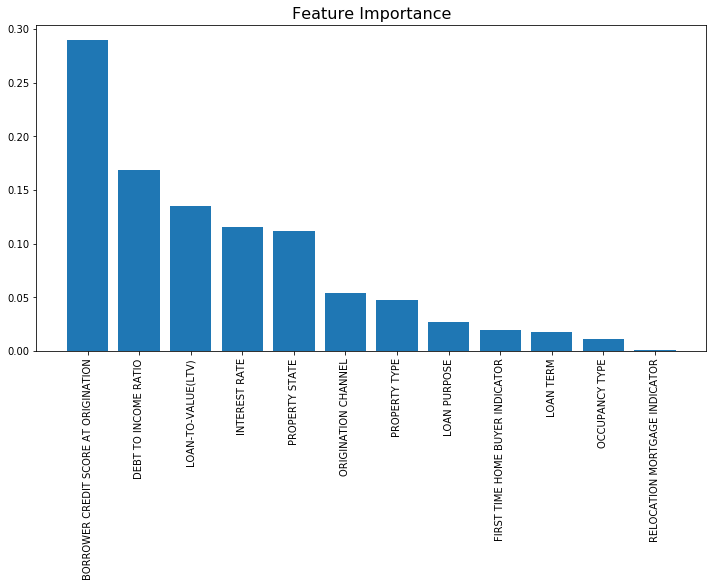

In [88]:
plt.figure(figsize=(12, 6))
plt.bar(range(1,13), importances[indices], align="center")
plt.xticks(range(1,13), fan_trainf.columns[fan_trainf.columns != "Default Status"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

In [89]:
std = RobustScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [90]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsemble

In [91]:
random_undersampler = RandomUnderSampler()
X_res, y_res = random_undersampler.fit_sample(X_train, y_train)

In [92]:
perms = np.random.permutation(X_res.shape[0])
X_res = X_res[perms]
y_res = y_res[perms]
X_res.shape, y_res.shape

((4556, 12), (4556,))

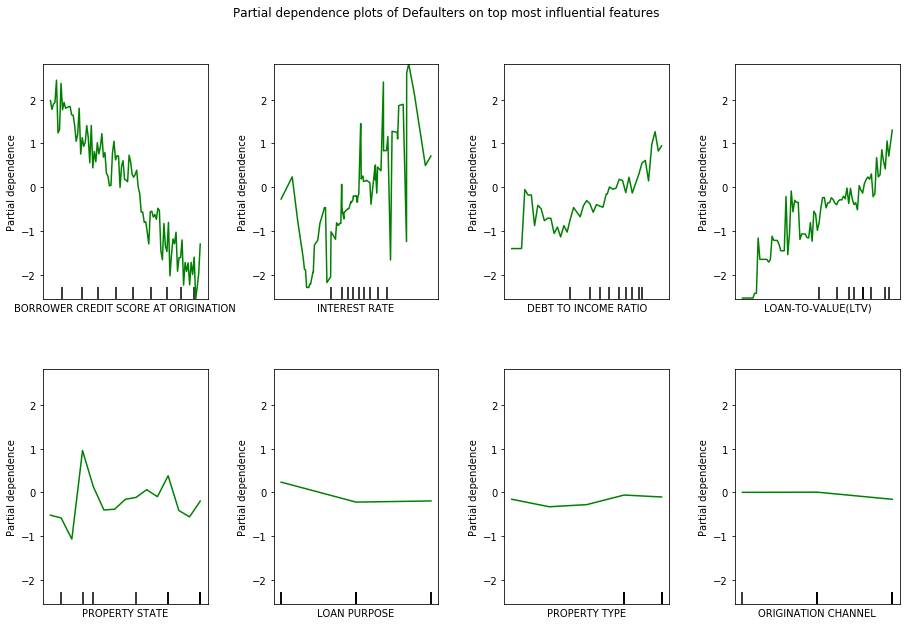

In [98]:
gbrt = GradientBoostingClassifier(loss="deviance",
                                  learning_rate=0.1,
                                  n_estimators=1000,
                                  max_depth=3,
                                  random_state=123)
gbrt.fit(X_res, y_res)
fig, axes = plot_partial_dependence(gbrt, X_res,
                                    np.argsort(gbrt.feature_importances_)[::-1][:8],
                                    n_cols=4,
                                    feature_names=fan_trainf.columns[:-1],
                                    figsize=(14, 10))
plt.subplots_adjust(top=0.9)
plt.suptitle("Partial dependence plots of Defaulters on top most influential features")
for ax in axes: ax.set_xticks(())